# Machine Reading: Advanced Topics in Word Vectors
## Part II. Word Vectors via Word2Vec (50 mins)

This is a 4-part series of Jupyter notebooks on the topic of word embeddings originally created for a workshop during the Digital Humanities 2018 Conference in Mexico City. Each part is comprised of a mix of theoretical explanations and fill-in-the-blanks activities of increasing difficulty.

Instructors:
- Eun Seo Jo, <a href="mailto:eunseo@stanford.edu">*eunseo@stanford.edu*</a>, Stanford University
- Javier de la Rosa, <a href="mailto:versae@stanford.edu">*versae@stanford.edu*</a>, Stanford University
- Scott Bailey, <a href="mailto:scottbailey@stanford.edu">*scottbailey@stanford.edu*</a>, Stanford University

This unit will focus on Word2Vec as an example of neural net-based approaches of vector encodings, starting with a conceptual overview of the algorithm itself and end with an activity to train participants’ own vectors.

● 0:00 - 0:15 Conceptual explanation of Word2Vec

● 0:15 - 0:30 Word2Vec Visualization and Vectorial Features and Math

● 0:30 - 0:50 [Activity 2] Word2Vec Construction [using Gensim] and Visualization (from part 1) [We provide corpus]

In [3]:
!pip install -r requirements.txt

distributed 1.21.8 requires msgpack, which is not installed.


In [4]:
import gensim
from nltk.tokenize import sent_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer

In [5]:
### reimporting and reloading materials from part 1
from nltk.corpus import gutenberg

In [6]:
mobydick = gutenberg.raw('melville-moby_dick.txt')
emma = gutenberg.raw('austen-emma.txt')
parents = gutenberg.raw('edgeworth-parents.txt')



In [7]:
corpus = [mobydick, emma, parents]

In [8]:
#Let's split our corpus into setences. Example of doing this on mobydick.
sentences = sent_tokenize(corpus[0])


In [9]:
tokenizer = TreebankWordTokenizer()

In [10]:
#Takes as input a list of text and converts it for gensim word2vec 
# (lower case, sentence tokenization, tokenization)
# sentences = [['hi', 'there'], ['this', 'is', 'a', 'sentence']]

def makeSentences(list_txt):
  all_txt = []
  for txt in list_txt:
    lower_txt = txt.lower()
    sentences = sent_tokenize(lower_txt)
    sentences = [tokenizer.tokenize(sent) for sent in sentences]
    all_txt += sentences
    print(len(sentences))# let's check how many sentences there are per item
  return all_txt

In [11]:
sentences = makeSentences(corpus)

9822
7489
10054


In [12]:
#To train our vectors we call this funtion below. This function has a couple dozen parameters some are more important than others.
#We will explain a few major parameters here. The fields that are MANDATORY are marked with an asterisk:
# 1. sentences*: This is where you provide your data. It must be in a format of iterable of iterables.
# 2. sg: Your choice of training algorithm. There are two ways of training W2V vectors -- 'skipgram' and 'CBOW'.
#        If you enter 1 here the skip-gram is applied; otherwise, the default is CBOW.
# 3. size*: This is the length of your resulting word vectors. If you have a large corpus (>1 billion tokens) you can 
#          go up to 100-300 dimensions. Generally word vectors with more dimensions gives better results.
# 4. window: This is the window of context words you are training on. In other words, how many words come before and after your given word.
#          A good number is 50 here but this can vary depending on what you are interested in. For instance, if you are more interested
#          in embeddings that embody semantic meaning, smaller window sizes work better. 
# 5. alpha: learning rate of your model. If you are interested in machine learning experimentations of your vectors you may experiment with this parameter.
# 6. seed (int): this is the random seed for your random initialization. All deep learning models initialize the weights with random floats before training.
#          This is a useful field if you want to replicate your experiments because giving this a seed will initialize 'randomly' deterministically.
# 7. min_count: This is the minimum frequency threshold. If a given word appears with lower frequency than provided it will be ignored. This is here because words with very low
#             frequency are hard to train.
# 8. iter: This is the number of iterations(entire run) over the corpus, also known as epochs. Usually anything between 1-10 is ok. 
#        The trade offs are that if you have higher iterations, it will take longer to train and the model may overfit on your dataset.
#     However, longer training will allow your vectors to perform better on tasks relevant to your dataset.

# Overall, most of these settings wil not concern you unless you are interested in very specific usages of word vectors.

model_example = gensim.models.Word2Vec(sentences, min_count=1, size=100)


In [13]:
#Another way of training word2vec vectors with gensim is to use the LineSentence function
linesentence_example = gensim.models.word2vec.LineSentence('text8') #provide the name of the corpus text you want to train on

In [14]:
model = gensim.models.Word2Vec(linesentence_example, min_count=1, size=100)

In [15]:
model.wv.vocab

{'anarchism': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2048>,
 'originated': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2080>,
 'as': <gensim.models.keyedvectors.Vocab at 0x1a6a6c20b8>,
 'a': <gensim.models.keyedvectors.Vocab at 0x1a6a6c20f0>,
 'term': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2128>,
 'of': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2160>,
 'abuse': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2198>,
 'first': <gensim.models.keyedvectors.Vocab at 0x1a6a6c21d0>,
 'used': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2208>,
 'against': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2240>,
 'early': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2278>,
 'working': <gensim.models.keyedvectors.Vocab at 0x1a6a6c22b0>,
 'class': <gensim.models.keyedvectors.Vocab at 0x1a6a6c22e8>,
 'radicals': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2320>,
 'including': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2358>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1a6a6c2390>,
 '

In [16]:
# It's possible to save your trained model in your disk
model.save('/tmp/our_model')

In [17]:
#Then you can reload your trained model
our_model = gensim.models.Word2Vec.load('/tmp/our_model') 

In [18]:
model.wv['is']

array([-0.06151085, -2.4027665 , -1.1089463 ,  1.050776  ,  2.105713  ,
        0.14845376,  0.5259758 ,  2.4402359 , -4.506644  ,  0.31155097,
        3.479788  , -2.319769  , -2.2697828 , -2.3265483 , -0.940049  ,
       -0.88514966, -1.4822022 ,  1.0073534 ,  4.6747675 ,  0.29556948,
       -0.01245196,  0.86173445,  1.016062  ,  0.63714325, -0.14469928,
       -2.622832  ,  0.9310783 ,  0.0968147 ,  0.03464442, -0.8929096 ,
        2.1435058 , -1.7520674 ,  1.2180465 ,  0.92468476, -1.9412155 ,
       -0.15675865, -2.206322  , -1.948954  ,  3.039507  , -2.5899174 ,
       -0.27364695,  2.6397243 ,  0.45905137,  1.8632202 , -1.1568995 ,
        2.2290506 , -1.4946257 , -0.35152644,  2.8900757 , -1.6007091 ,
        2.1606822 ,  0.45912123, -0.8300609 , -1.4873226 , -1.3894068 ,
        0.4670449 ,  1.0356367 , -1.6964449 , -0.60079634, -2.0053542 ,
       -1.7107284 , -0.53588694, -2.8021576 ,  1.7642993 , -3.346164  ,
        0.64714634,  1.1150603 , -3.9615014 , -3.110895  ,  0.19

In [19]:
model.wv['you']

array([-2.782798  ,  4.3921356 , -1.2575144 , -0.17272167,  2.663565  ,
        2.4152453 ,  1.107749  ,  0.87033665,  4.083021  , -5.1756964 ,
       -1.1338964 , -0.0632204 ,  1.2648302 , -3.4565895 , -0.6604472 ,
        2.6128628 ,  0.47986835,  1.1802721 ,  0.3921457 ,  0.22665146,
        1.0146043 , -0.9625913 ,  1.5036656 , -1.0360812 ,  0.11017302,
       -1.6100167 ,  2.59847   , -3.2081726 , -0.17713168, -0.85830367,
       -0.50342095, -2.302022  , -1.0186428 ,  2.3392563 ,  0.3130643 ,
        5.275438  ,  5.797816  ,  1.9858631 ,  1.8560486 ,  0.7186616 ,
       -0.0302324 ,  2.4759398 ,  0.34672573, -0.8669094 ,  0.88754785,
       -0.07529461,  0.43474132,  0.6132372 ,  5.900575  , -5.3660235 ,
       -0.2318477 , -0.94959426,  3.1033037 ,  1.8903005 ,  3.8736975 ,
        1.9201968 , -1.3595103 ,  1.044208  , -2.5569327 , -0.59668833,
       -0.18952875,  1.5602691 , -2.1412244 ,  0.41549283, -1.6518568 ,
        2.6427395 , -0.4238053 , -1.559804  ,  0.91076565,  3.63

In [20]:
type(model.wv)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [21]:
my_model = our_model.wv #save just the vectors from your model

In [22]:
del our_model #this is to save RAM

In [23]:
print(type(my_model))

<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>


In [24]:
len(my_model.vocab) #the number of words in our model

253854

In [25]:
#If you are interested in using pretrained vectors you can also call pretrained materials
import gensim.downloader as pretrained

In [26]:
#all corpora available are here.
#You can use this if you want to train from the given corpora.
pretrained.info()['corpora'].keys()

dict_keys(['semeval-2016-2017-task3-subtaskBC', 'semeval-2016-2017-task3-subtaskA-unannotated', 'patent-2017', 'quora-duplicate-questions', 'wiki-english-20171001', 'text8', 'fake-news', '20-newsgroups', '__testing_matrix-synopsis', '__testing_multipart-matrix-synopsis'])

In [27]:
#all pretrained models available are here.
#You can use this if you want to use the trained models.
pretrained.info()['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [28]:
#Let's work with the word2vec trained on google news
#Let's look at some description for the corpus named 'text8'
pretrained.info('text8')

{'num_records': 1701,
 'record_format': 'list of str (tokens)',
 'file_size': 33182058,
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/text8/__init__.py',
 'license': 'not found',
 'description': 'First 100,000,000 bytes of plain text from Wikipedia. Used for testing purposes; see wiki-english-* for proper full Wikipedia datasets.',
 'checksum': '68799af40b6bda07dfa47a32612e5364',
 'file_name': 'text8.gz',
 'read_more': ['http://mattmahoney.net/dc/textdata.html'],
 'parts': 1}

In [29]:
news_model = pretrained.load('word2vec-google-news-300')

In [30]:
my_model = news_model.wv
del news_model

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [31]:
my_model['test']

array([-1.42578125e-01, -3.68652344e-02,  1.35742188e-01, -6.20117188e-02,
        7.95898438e-02,  1.90429688e-02, -8.15429688e-02, -1.27929688e-01,
       -2.95410156e-02,  2.36328125e-01, -1.21582031e-01, -2.14843750e-01,
        1.29882812e-01, -2.70996094e-02, -5.20019531e-02,  2.15820312e-01,
       -1.81640625e-01,  5.10253906e-02, -1.60156250e-01, -1.76757812e-01,
        1.83105469e-02, -4.12597656e-02, -2.32421875e-01, -1.03149414e-02,
        1.45507812e-01,  5.24902344e-02, -3.96484375e-01, -1.92871094e-02,
        2.51770020e-03, -1.26953125e-02, -4.39453125e-02,  3.07617188e-02,
        9.57031250e-02, -1.75781250e-01,  1.04370117e-02,  1.89453125e-01,
       -2.36328125e-01,  4.37011719e-02,  2.81250000e-01, -2.07519531e-02,
       -1.81640625e-01, -2.17773438e-01,  2.33398438e-01,  5.29785156e-02,
       -1.13769531e-01,  9.39941406e-03, -1.49414062e-01,  1.99218750e-01,
       -1.75781250e-01,  3.16406250e-01,  8.10546875e-02, -6.12792969e-02,
       -1.52343750e-01, -

In [32]:
#similarity tasks

In [33]:
my_model.similarity('beautiful','sublime') #Using Cosine-similarity


0.44833773461372856

In [34]:
#What do you think will be the similarity measure between 'sublime' and 'sublime'?
my_model.similarity('sublime','sublime')

0.9999999999999999

In [35]:
#Another way of doing the same thing would be
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(my_model['beautiful'].reshape(1,-1), my_model['sublime'].reshape(1,-1))

array([[0.44833776]], dtype=float32)

In [36]:
#We can see that words that are used in similar contexts appear closer to each other than those not!
print(my_model.similarity('potato', 'leek')) 
print(my_model.similarity('anger', 'potato'))

0.4789269059201001
0.0155280012408357


In [37]:
#There is also a built in tool for returning a list of most similar words to a given word.
my_model.most_similar('democracy'), my_model.most_similar('liberalism')

([('democratic', 0.864448070526123),
  ('participatory_democracy', 0.7170747518539429),
  ('democracies', 0.710315465927124),
  ('democratization', 0.7038753628730774),
  ('pluralism', 0.6955404281616211),
  ('multiparty_democracy', 0.6909584403038025),
  ('democractic', 0.6702337265014648),
  ('democratic_ideals', 0.6659173369407654),
  ('pluralist_democracy', 0.6640663743019104),
  ('constitutionalism', 0.6593047380447388)],
 [('conservatism', 0.8018674850463867),
  ('progressivism', 0.7581014633178711),
  ('leftism', 0.7086032629013062),
  ('libertarianism', 0.7042546272277832),
  ('statism', 0.693485677242279),
  ('liberal', 0.6907880902290344),
  ('liberal_internationalism', 0.6821509003639221),
  ('Liberalism', 0.6777896285057068),
  ('classical_liberalism', 0.6775410771369934),
  ('Conservatism', 0.677297830581665)])

In [38]:
my_model.most_similar('pluralism', topn=20)

[('pluralistic', 0.7280019521713257),
 ('pluralist', 0.7193902730941772),
 ('democracy', 0.6955404281616211),
 ('pluralist_democracy', 0.6928413510322571),
 ('democratic', 0.6840701699256897),
 ('religious_pluralism', 0.6559314131736755),
 ('pluralist_society', 0.6442460417747498),
 ('pluralism_tolerance', 0.631464421749115),
 ('democratization', 0.6295616030693054),
 ('pluralistic_democracy', 0.6286231279373169),
 ('secularism', 0.6188281774520874),
 ('multireligious_society', 0.6062011122703552),
 ('pluralistic_democratic', 0.603635311126709),
 ('religious_tolerance', 0.6026619076728821),
 ('democratic_polity', 0.5967641472816467),
 ('democratic_ideals', 0.5910589098930359),
 ('pluralistic_society', 0.5879446864128113),
 ('religious_toleration', 0.5857032537460327),
 ('democratic_freedoms', 0.5824508666992188),
 ('illiberal_democracy', 0.5818257331848145)]

In [39]:
#You can also identify the word with the most similar vector from a list of candidates
candidates = ['sweet','sour','bitter','nice']
my_model.most_similar_to_given('blueberry', candidates)

'sweet'

In [40]:
#You can see that of the candidates 'sour' has the highest similarity measure with 'blueberry' at least in our corpus.
for c in candidates:
    print(c, my_model.similarity('blueberry',c))

sweet 0.3033926176016938
sour 0.20343720426644013
bitter 0.18500672031976945
nice 0.07704492863613943


In [41]:
#You can generate of list of words that are closer to 'cold' than is 'dry'
my_model.words_closer_than('cold','dry')

['winter',
 'warm',
 'temperatures',
 'wet',
 'freezing',
 'warmer',
 'icy',
 'chill',
 'chilly',
 'Cold',
 'windy',
 'colder',
 'snowy',
 'chilled',
 'frigid',
 'humid',
 'coldest',
 'freezing_temperatures',
 'cold_snap',
 'foggy',
 'frosty',
 'shivering',
 'arctic',
 'balmy',
 'wintry',
 'bitterly_cold',
 'frigid_temperatures',
 'toasty',
 'hot_humid',
 'unseasonably_warm',
 'colder_temperatures',
 'bone_chilling',
 'chilly_temperatures',
 'cold_winters',
 'subzero_temperatures',
 'unseasonably_cold',
 'wintery',
 'COLD',
 'unusually_warm',
 'coldest_winter',
 'sub_freezing_temperatures',
 'bone_chilling_cold',
 'Bitter_cold',
 'subzero',
 'arctic_blast',
 'unseasonably_hot',
 'warm_humid',
 'frigid_weather',
 'bone_chilling_temperatures',
 'teeth_chattering',
 'chilliest',
 'toasty_warm',
 'subfreezing',
 'cooler_temps',
 'Sweltering',
 'unseasonable_cold',
 'freezing_temps',
 'frost_bitten',
 'subzero_weather',
 'Brrrr',
 'unseasonably_chilly',
 'warmish',
 'frigid_temps',
 'biting

You can also play with analogy tasks. The commonly seen task is:

'London is to England as Baghdad is to ____?'


' A      is to A\*.     as B      is to  B\*  '
                         
Gensim provides two different ways of implementing this task. You may be more familiar with the the additive version also called the 3CosAdd method:

$$\underset{b*\in V}{\textrm{arg max}} (cos(b*,b) - cos(b*,a) + cos(b*,a*))$$

This reflects the abstraction of Baghdad - London + England. In this maximization, we are searching which word vector will allow us to produce the highest value in this equation.

The second is a more balanced approach proposed by Levy & Goldberg 2014 (http://www.aclweb.org/anthology/W14-1618)

We find B* by going through all of the possible B* in the set of vocabulary (V) and identifying which returns the highest value. In other words, finding the argument that maximizes the following equation where the epsilon is added only to avoid division by zero. This is also called the 3CosMul method:

$$\underset{b*\in V}{\textrm{arg max}} \frac{cos(b*,b)cos(b*,a*)}{cos(b*,a)+\epsilon}$$



In [42]:
#We can implement this method with the provided function.
#positive here refers to the words that give the positive contribution to similarity (nominator) and the negative refers to words that contribute negatively (denominator)
# This is the addition method.
my_model.most_similar(positive=['woman','king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.549946129322052),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [43]:
#This is the multiplication method.
my_model.most_similar_cosmul(positive=['england','baghdad'], negative=['london'])
#Unforuantely in this example we see that this returns Afganistan (when Baghdad is the capital of Iraq!). This is an example of how the corpus can bias our findings.

[('afganistan', 0.8269765973091125),
 ('afghanistan', 0.8165150284767151),
 ('iraqis', 0.8074595332145691),
 ('iraqi', 0.7976524829864502),
 ('taliban', 0.7952468395233154),
 ('al_queda', 0.7876250147819519),
 ('iraq', 0.7850340008735657),
 ('gadhafi', 0.7798774838447571),
 ('sri_lanka', 0.778986394405365),
 ('al_qaida', 0.7776364088058472)]

What are good vectors? What are bad vectors? How much training/data do we need?

Question! What would happen is you retrained your model on the same corpus? Would you get the same vectors?

In [44]:
# see documentation here for more built-in tools! https://radimrehurek.com/gensim/models/keyedvectors.html



In [46]:
#What about GloVe? You can use GloVe vectors with Gensim too!
#Overview of GloVe. What's the difference? How to use GloVe vectors with Gensim

from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
glove_file = "./glove/glove.6B.300d.txt"
glove2word2vec_file = "glove2word2vec.txt"
glove2word2vec(glove_file, glove2word2vec_file) #we simply call this function to reformat it a bit
glove_model = KeyedVectors.load_word2vec_format(glove2word2vec_file, binary=False) #read in the same file 

In [47]:
glove_model['test']

array([ 2.6640e-02,  7.3666e-01,  1.4519e-01, -1.2378e+00, -7.8431e-02,
        1.1878e-01,  1.1072e-01, -5.7459e-01, -5.0329e-01, -2.0694e+00,
        5.6273e-01, -6.5392e-02,  2.6165e-01, -2.9559e-01, -1.3630e-01,
        6.6476e-01,  1.1782e-01,  8.5784e-02, -3.1630e-01, -4.7456e-01,
       -3.1628e-01, -6.1258e-01,  1.6968e-01,  2.9080e-01,  1.5166e-02,
        1.9775e-01,  2.6749e-01,  1.0875e-01, -8.6687e-02, -5.8117e-01,
        1.9078e-02, -3.5914e-01, -2.6973e-01, -7.0312e-02, -7.1556e-01,
        1.1675e-01, -5.7603e-01,  2.2745e-01, -5.4766e-01,  1.5907e-01,
        3.0659e-01,  3.1730e-01,  1.1656e-01, -1.0250e-01,  1.1470e-03,
       -2.2274e-01, -5.3550e-01, -4.3364e-01, -2.0306e-01, -3.5997e-01,
        3.5991e-01, -2.0668e-01,  1.4845e-01,  7.7065e-02,  5.2591e-02,
        3.8939e-01,  9.9486e-02, -5.3198e-01, -1.0236e-01,  3.1587e-01,
        2.4825e-01, -3.3952e-01,  8.6676e-02, -3.4517e-01,  4.2221e-01,
        3.3158e-01,  3.3441e-01, -3.4035e-01,  4.9647e-02,  4.55

In [51]:
#Let's see what happens if we run the same task on this new set of vectors
glove_model.most_similar_cosmul(positive=['england','baghdad'], negative=['london'])

[('iraq', 0.8279445171356201),
 ('fallujah', 0.785504162311554),
 ('iraqi', 0.7701656818389893),
 ('baqouba', 0.7685968279838562),
 ('mosul', 0.7604708671569824),
 ('najaf', 0.7585084438323975),
 ('iraqis', 0.7578032612800598),
 ('marines', 0.7569854259490967),
 ('soldiers', 0.7507175803184509),
 ('samarra', 0.7506063580513)]

In [52]:
#PCA visualizations

In [54]:
import numpy as np
from sklearn.decomposition import PCA

glove_matrix = glove_model.vectors #We're taking the vectors as a matrix



In [55]:
#We have to get the corresponding indices of our words

glove_model.index2word.index('september')

441

In [57]:
countries = ["china", "russia", "france", "germany","greece","japan","italy"]

In [58]:
capitals = ["beijing","moscow","paris","berlin","athens","tokyo","rome"]

In [59]:
X = []

for loc in countries+capitals:
    index = glove_model.index2word.index(loc)
    X.append(glove_matrix[index])

In [60]:
pca = PCA(n_components=2)
xy_coords = pca.fit_transform(X)
loc_x, loc_y = zip(*xy_coords)

In [61]:
loc_x

(3.980742761872989,
 0.9736519764565262,
 -2.4449608526434177,
 -1.6557736578802633,
 -1.9385075010959951,
 3.496010336738355,
 -3.0224848841528735,
 3.414143978018339,
 0.9186574599425092,
 -1.8621880028925155,
 -1.3593592643011898,
 -1.1887054715845773,
 3.364164038395803,
 -2.6753909168736905)

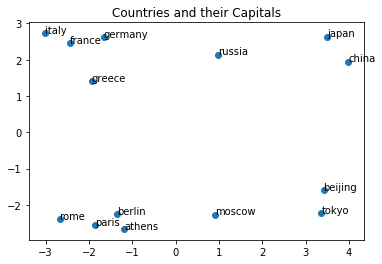

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(loc_x, loc_y)

for _, location in enumerate(countries+capitals):
    ax.annotate(location, (loc_x[_],loc_y[_]))

plt.title("Countries and their Capitals")
plt.show()